In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data=pd.read_csv(r"C:\Users\Jishanth M I\Downloads\sprint 7 cha\ds1_c4_s7_challenge-master\DS1_C4_S7_Car_Data_Challenge.csv")
data

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1271,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


# Task 1

In [4]:
# DROP THE ROWS WITH MISSING COLUMNS

data.isnull().sum()

S. No.                 0
Make                  75
Model                  0
Variant                0
Displacement          12
                    ... 
USB_Ports           1246
Heads-Up_Display    1224
Welcome_Lights      1206
Battery             1262
Electric_Range      1258
Length: 137, dtype: int64

In [5]:
data.dropna(subset=['Cylinders','Kerb_Weight','Make','Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Power','Torque'],inplace=True)

In [6]:
data.isnull().sum()

S. No.                0
Make                  0
Model                 0
Variant               0
Displacement          0
                   ... 
USB_Ports           314
Heads-Up_Display    315
Welcome_Lights      314
Battery             316
Electric_Range      316
Length: 137, dtype: int64

# Task 2

In [9]:
# REMOVE TEXT AND CONVERT INTO INTEGER

data['Kerb_Weight']=data['Kerb_Weight'].str.replace(' kg','')
data['Kerb_Weight']=data['Kerb_Weight'].astype(int)
data['Kerb_Weight']

24       920
25       940
26       928
29       745
30       750
        ... 
1270    1170
1271    1175
1272    1107
1273    1080
1274    2335
Name: Kerb_Weight, Length: 316, dtype: int32

In [10]:
data['Power']=data['Power'].str.strip()
data['Power']=data['Power'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'',regex=True)
data['Power']

24       73
25       74
26       73
29       68
30       68
       ... 
1270    100
1271    100
1272    119
1273    119
1274    202
Name: Power, Length: 316, dtype: object

In [12]:
data['Torque']=data['Torque'].str.replace(r"-",'',regex=True)
data['Torque']=data['Torque'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'',regex=True)
data['Torque']=pd.to_numeric(data['Torque'],errors='coerce')
data['Torque'].dtypes
data['Torque']

24      101.0
25      101.0
26      101.0
29       90.0
30       90.0
        ...  
1270    200.0
1271    200.0
1272    145.0
1273    145.0
1274    441.0
Name: Torque, Length: 316, dtype: float64

# Task 3

In [13]:
# FROM TASK 1,SHOW MEAN,MEDIAN,STD,COV FOR ALL COLUMNS


car=['Cylinders','Kerb_Weight','Make','Displacement','Fuel_Tank_Capacity_litre',
'City_Mileage_km_litre','Highway_Mileage_km_litre','Power','Torque']
filter_data=data[car]
filter_data

,Cylinders,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque
24,4.0,920,Maruti Suzuki,1196.0,40.0,12.00,15.00,73,101.0
25,4.0,940,Maruti Suzuki,1196.0,40.0,12.00,15.00,74,101.0
26,4.0,928,Maruti Suzuki,1196.0,40.0,11.00,15.00,73,101.0
29,3.0,745,Maruti Suzuki,998.0,35.0,14.00,17.00,68,90.0
30,3.0,750,Maruti Suzuki,998.0,35.0,14.00,17.00,68,90.0
...,...,...,...,...,...,...,...,...,...
1270,4.0,1170,Honda,1498.0,40.0,22.60,25.10,100,200.0
1271,4.0,1175,Honda,1498.0,40.0,22.60,25.10,100,200.0
1272,4.0,1107,Honda,1497.0,40.0,18.00,18.00,119,145.0
1273,4.0,1080,Honda,1497.0,40.0,14.30,16.40,119,145.0


In [17]:
fil=filter_data['Make'].unique()
for i in fil:
    w=filter_data[filter_data['Make']==i]
    print(f"manufracture:{i}")
    print("mean")
    print(w.mean())
    print("median")
    print(w.median())
    print("std")
    print(w.std())
    print("cov")
    print(w.std()/w.mean()*100)

manufracture:Maruti Suzuki
mean
Cylinders                      3.431818
Kerb_Weight                  898.363636
Displacement                1081.681818
Fuel_Tank_Capacity_litre      38.477273
City_Mileage_km_litre         18.765455
Highway_Mileage_km_litre      20.671818
Torque                       115.886364
dtype: float64
median
Cylinders                     3.0
Kerb_Weight                 810.0
Displacement                998.0
Fuel_Tank_Capacity_litre     35.0
City_Mileage_km_litre        20.0
Highway_Mileage_km_litre     22.0
Power                        68.0
Torque                       90.0
dtype: float64
std
Cylinders                     0.501056
Kerb_Weight                 155.321586
Displacement                147.547040
Fuel_Tank_Capacity_litre      5.359142
City_Mileage_km_litre         4.388711
Highway_Mileage_km_litre      3.330682
Torque                       47.035966
dtype: float64
cov
Cylinders                   14.600306
Kerb_Weight                 17.289389
Displac

C:\Users\Jishanth M I\AppData\Local\Temp\ipykernel_23620\706201570.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(w.mean())
C:\Users\Jishanth M I\AppData\Local\Temp\ipykernel_23620\706201570.py:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(w.median())
C:\Users\Jishanth M I\AppData\Local\Temp\ipykernel_23620\706201570.py:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. S

In [18]:
car1=data[['Make','Displacement']]
car1

,Make,Displacement
24,Maruti Suzuki,1196.0
25,Maruti Suzuki,1196.0
26,Maruti Suzuki,1196.0
29,Maruti Suzuki,998.0
30,Maruti Suzuki,998.0
...,...,...
1270,Honda,1498.0
1271,Honda,1498.0
1272,Honda,1497.0
1273,Honda,1497.0


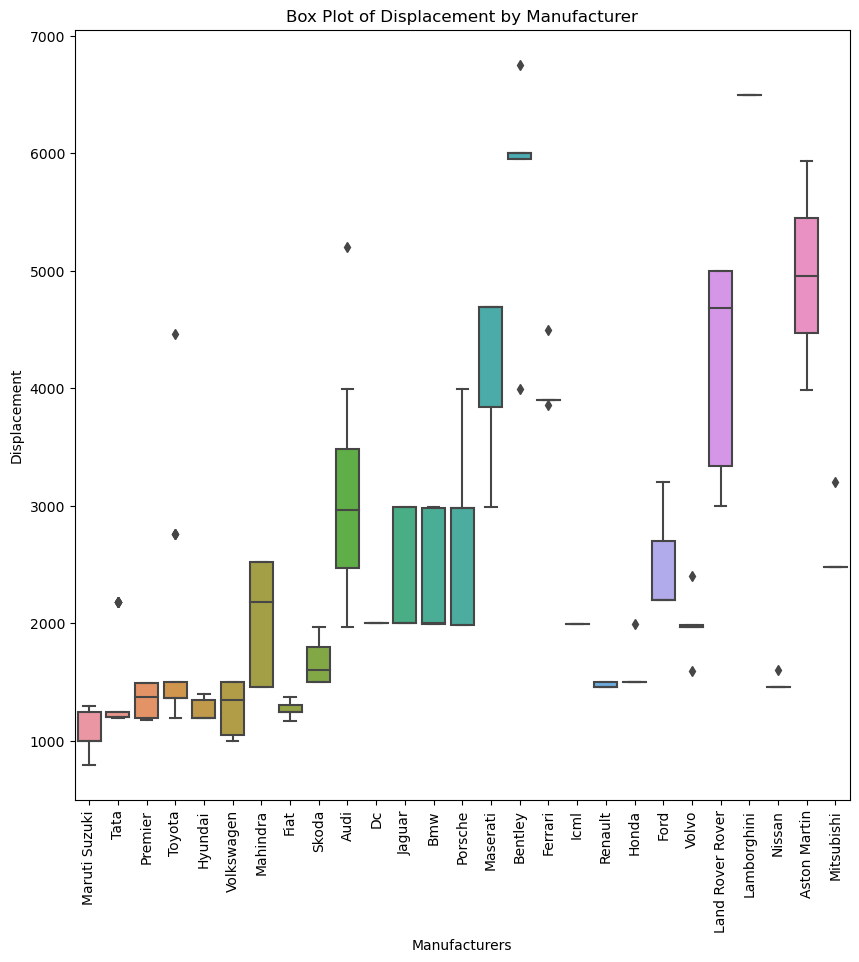

In [20]:
plt.figure(figsize=(10,10))
sb.boxplot(x=car1['Make'],y=car1['Displacement'])
plt.xticks(rotation = 90)
plt.xlabel("Manufacturers")
plt.title('Box Plot of Displacement by Manufacturer')
plt.show()

# Task 4

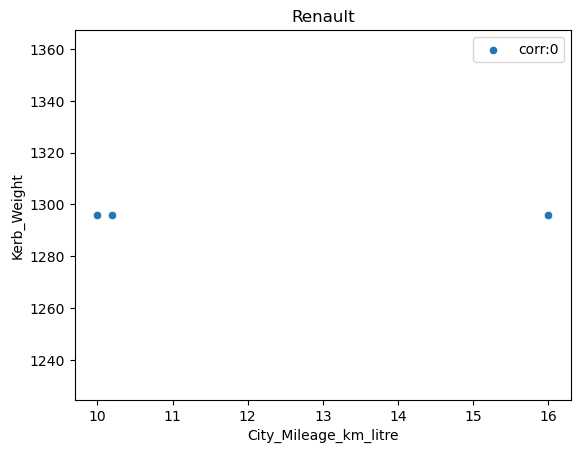

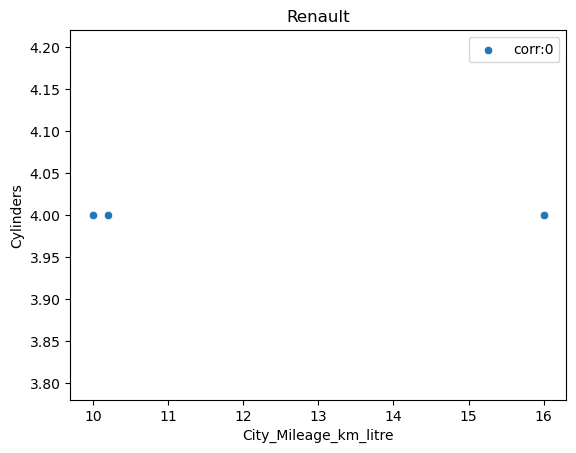

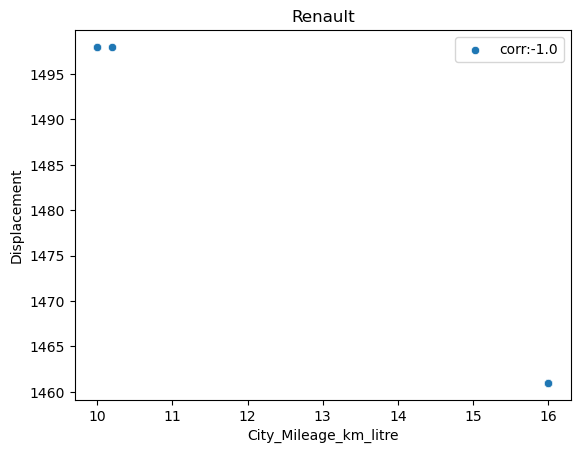

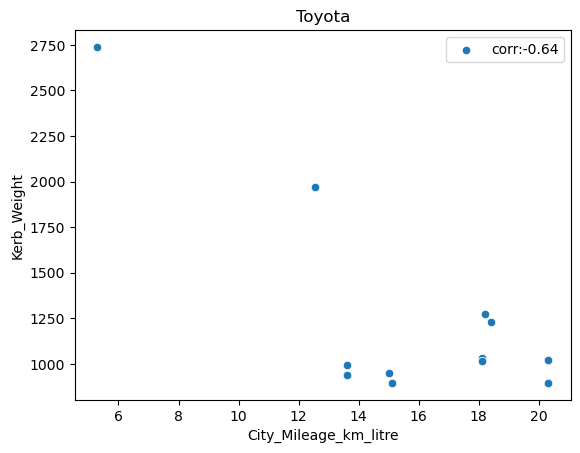

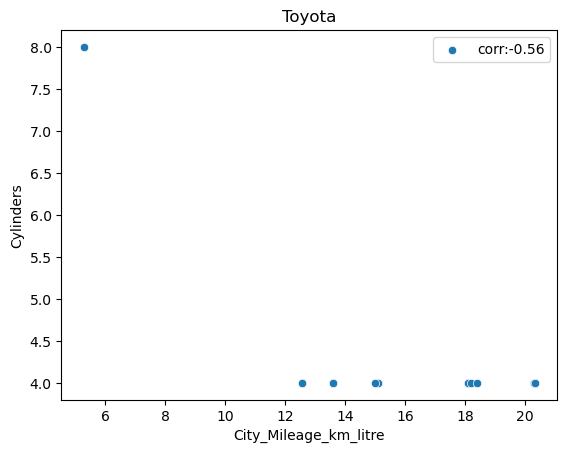

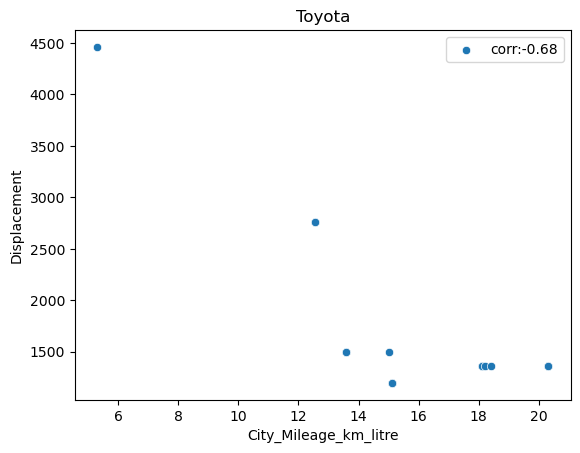

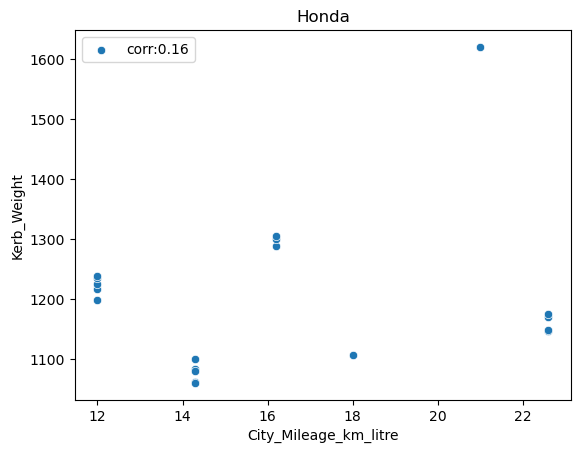

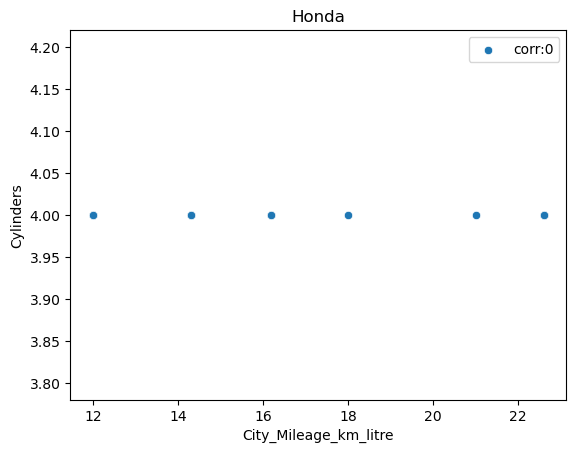

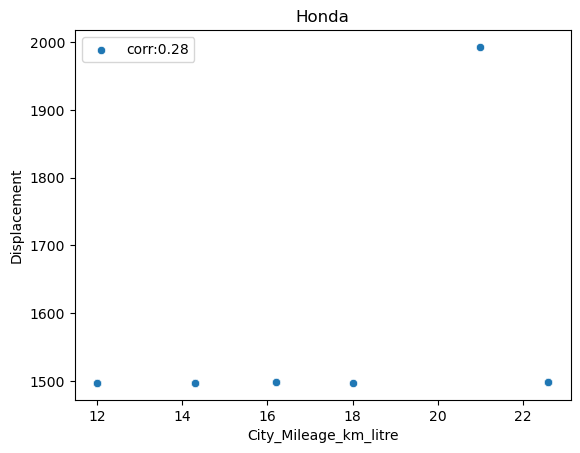

['Renault', 'Kerb_Weight', 0]
['Renault', 'Cylinders', 0]
['Renault', 'Displacement', -1.0]
['Toyota', 'Kerb_Weight', -0.64]
['Toyota', 'Cylinders', -0.56]
['Toyota', 'Displacement', -0.68]
['Honda', 'Kerb_Weight', 0.16]
['Honda', 'Cylinders', 0]
['Honda', 'Displacement', 0.28]


In [24]:
# THREE FEATURE HOW TO AFFECT THE CITY MILEAGE


r=data[(data['Make']=='Renault')]
t=data[(data['Make']=='Toyota')]
h=data[(data['Make']=='Honda')]


R=r[['Make','City_Mileage_km_litre','Cylinders','Kerb_Weight','Displacement']]
T=t[['Make','City_Mileage_km_litre','Cylinders','Kerb_Weight','Displacement']]
H=h[['Make','City_Mileage_km_litre','Cylinders','Kerb_Weight','Displacement']]
l=[]
for i in [R,T,H]:
    i=i.reset_index(drop=True)
    i=i.set_index('Make')
    
    for j in ["Kerb_Weight","Cylinders","Displacement"]:
        r=round(i['City_Mileage_km_litre'].corr(i[j]),2)
        if np.isnan(r):
            r=0
        l.append([i.index[0],j,r])
        sb.scatterplot(x=i['City_Mileage_km_litre'],y=i[j],label=(f'corr:{r}'))
        plt.title(i.index[0])
        plt.show()
for c in l:
    print(c)